# The Battle Of Neighbourhood week 2

The past week I worked on getting my data base ready for the second step.
I am now gonna exploit the database I built about all the biggest cities.

In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
df=pd.read_csv('datas.csv')
df.reset_index(drop=True)
df.drop(columns=['empty','Unnamed: 0'], inplace=True)
df.head()

,City,Country,Population city,Latitude,Longitude,ATM,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yemeni Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit
0,Chongqing,China,30751600.0,29.56278,106.55278,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Shanghai,China,24256800.0,31.22222,121.45806,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.003484,0.0,0.0,0.003484,0.0,0.003484,0.0,0.0,0.0
2,Beijing,China,21516000.0,39.90750,116.39723,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.013468,0.0,0.0,0.0
3,Lagos,Nigeria,16060303.0,6.45471,3.38876,0.0,0.0,0.0,0.0,0.0,...,0.034483,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,Dhaka,Bangladesh,8906039.0,23.71323,90.39957,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [3]:
columns=df.columns.tolist()
columns=columns[5:]
X=df[columns]

In [4]:
clustering = KMeans(n_clusters=10, random_state=0).fit(X)

In [5]:
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)
results.head()

,City,Country,Population city,Latitude,Longitude,ATM,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,...,Xinjiang Restaurant,Yakitori Restaurant,Yemeni Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit,Label
0,Chongqing,China,30751600.0,29.56278,106.55278,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
1,Shanghai,China,24256800.0,31.22222,121.45806,0.0,0.0,0.0,0.0,0.0,...,0.003484,0.0,0.0,0.003484,0.0,0.003484,0.0,0.0,0.0,1
2,Beijing,China,21516000.0,39.90750,116.39723,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.013468,0.0,0.0,0.0,1
3,Lagos,Nigeria,16060303.0,6.45471,3.38876,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6
4,Dhaka,Bangladesh,8906039.0,23.71323,90.39957,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6


In [6]:
# 'darkpurple', 'green','gray', 'lightgray','beige', 'white','lightred','darkblue','lightblue',
colors=['red', 'blue', 'purple', 'orange', 'darkred',
        'darkgreen',
        'lightgreen',  'black',
        'gray', 'pink', 'cadetblue',]
len(colors)

11

In [7]:
map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
for i, point in results.iterrows():
    folium.Circle(location=[point['Latitude'],point['Longitude']],
                  popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                  color=colors[point['Label']],
                  radius=100000,
                  fill=True,
                  fill_color=colors[point['Label']]).add_to(map)

map

From here, we see that there is a correlation between a region and the proportions of the category of venues in the center of the city.
Now it's gonna be question to find the right number of cluster.

### Right number of Clusters with KMeans

In [8]:
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)
results.head()

for k in range (2, 13):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    clustering = KMeans(n_clusters=k, random_state=1).fit(X)    
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = clustering.labels_
 
    # Sum of distances of samples to their closest cluster center
    inertia = clustering.inertia_
    silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
    C_H_score=metrics.calinski_harabaz_score(X, labels)
    print("k:",k, " cost:", inertia,
          '\nsilhouette score:',silhouette_score,
          '\nCalinski Harabaz score:',C_H_score,
         '\n')

k: 2  cost: 7.7786426319200315 
silhouette score: 0.21717234269563634 
Calinski Harabaz score: 29.551521114396316 

k: 3  cost: 7.3873623426835735 
silhouette score: 0.14585924188318936 
Calinski Harabaz score: 21.93000181323335 

k: 4  cost: 7.072906834756934 
silhouette score: 0.07454315448669362 
Calinski Harabaz score: 18.79352709160803 

k: 5  cost: 6.777705223332313 
silhouette score: 0.1477608938849788 
Calinski Harabaz score: 17.272452203570147 

k: 6  cost: 6.573103549522856 
silhouette score: 0.11132199530858083 
Calinski Harabaz score: 15.683055207606307 

k: 7  cost: 6.370641650305487 
silhouette score: 0.08204990532196256 
Calinski Harabaz score: 14.694294070654488 

k: 8  cost: 6.1696169146523605 
silhouette score: 0.09660814014387856 
Calinski Harabaz score: 14.058902159458349 

k: 9  cost: 5.911731472653752 
silhouette score: 0.11984693453379382 
Calinski Harabaz score: 14.076544620305452 

k: 10  cost: 5.908533244080057 
silhouette score: 0.053626475953803834 
Calinski

From this, we can see that there are two (or three) possible number of clusters:  

<i>(Silhouette score: the closer to 1 the more dense clusters are, the closer to 0, the more overlapping are the clusters)
(Calinsky Harabaz score, the denser and separated are the clusters)</i>

k=2, k=6, k=9  
k=2 is too small for us to analyze.  
k=6 has a slightly smaller silhouette score than k=9. The more number of cluster, the better it is to study.
    
<b>We are gonna settle for 9 clusters. </b>

In [9]:
clustering = KMeans(n_clusters=9, random_state=0).fit(X)
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)

In [10]:
map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
for i, point in results.iterrows():
    folium.Circle(location=[point['Latitude'],point['Longitude']],
                  popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                  color=colors[point['Label']],
                  radius=100000,
                  fill=True,
                  fill_color=colors[point['Label']]).add_to(map)

map

### Right number of clusters with the spectral clustering

In [11]:
for k in range (2, 13):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    clustering = SpectralClustering(n_clusters=k,
                                    assign_labels='kmeans',random_state=1).fit(X) 
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = clustering.labels_
 
    # Sum of distances of samples to their closest cluster center
    #inertia = clustering.inertia_
    silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
    C_H_score=metrics.calinski_harabaz_score(X, labels)
    print("k:",k,'silhouette score:',silhouette_score,
          '\nCalinski Harabaz score:',C_H_score,
         '\n')

k: 2 silhouette score: 0.21717234269563634 
Calinski Harabaz score: 29.551521114396316 

k: 3 silhouette score: 0.11528195801546193 
Calinski Harabaz score: 21.333067322302973 

k: 4 silhouette score: 0.10997867439247942 
Calinski Harabaz score: 17.88665102688148 

k: 5 silhouette score: 0.04863007348767332 
Calinski Harabaz score: 16.944831942712 

k: 6 silhouette score: 0.059690837235746246 
Calinski Harabaz score: 15.895075091509435 

k: 7 silhouette score: 0.06880718983677947 
Calinski Harabaz score: 15.102303722321727 

k: 8 silhouette score: 0.08940061358517866 
Calinski Harabaz score: 14.553588612653723 

k: 9 silhouette score: 0.08482904625281808 
Calinski Harabaz score: 13.353819243685741 

k: 10 silhouette score: 0.09630148578925454 
Calinski Harabaz score: 12.193461007938271 

k: 11 silhouette score: 0.08871478607828998 
Calinski Harabaz score: 11.978432673326433 

k: 12 silhouette score: 0.09529198478104506 
Calinski Harabaz score: 11.792379638017888 



We see here that k=8 is maximizing the silhouette score for a good Calinski Harabaz score.

In [12]:
clustering = SpectralClustering(n_clusters=8,
                                    assign_labels='kmeans',random_state=1).fit(X)
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)
map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
for i, point in results.iterrows():
    folium.Circle(location=[point['Latitude'],point['Longitude']],
                  popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                  color=colors[point['Label']],
                  radius=100000,
                  fill=True,
                  fill_color=colors[point['Label']]).add_to(map)

map

### Right number of clusters with agglomerative clustering

In [13]:
for k in range (2, 13):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=k,
            pooling_func='deprecated').fit(X)  
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = clustering.labels_
 
    # Sum of distances of samples to their closest cluster center
    #inertia = clustering.inertia_
    silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
    C_H_score=metrics.calinski_harabaz_score(X, labels)
    print("k:",k, 'silhouette score:',silhouette_score,
          '\nCalinski Harabaz score:',C_H_score,
         '\n')

k: 2 silhouette score: 0.21898573257078144 
Calinski Harabaz score: 26.791953224676387 

k: 3 silhouette score: 0.13853022692007858 
Calinski Harabaz score: 20.07387314745152 

k: 4 silhouette score: 0.144182212617821 
Calinski Harabaz score: 17.694442805475134 

k: 5 silhouette score: 0.09350205007754853 
Calinski Harabaz score: 15.978901736894285 

k: 6 silhouette score: 0.10435173751933678 
Calinski Harabaz score: 14.890526066259916 

k: 7 silhouette score: 0.10977832098982009 
Calinski Harabaz score: 14.263310456256583 

k: 8 silhouette score: 0.11631756594694238 
Calinski Harabaz score: 13.67864449976914 

k: 9 silhouette score: 0.12185981165528383 
Calinski Harabaz score: 13.292660686953802 

k: 10 silhouette score: 0.1249102416808628 
Calinski Harabaz score: 12.94402076527 

k: 11 silhouette score: 0.08926928622925298 
Calinski Harabaz score: 12.533733092597442 

k: 12 silhouette score: 0.09212431942030207 
Calinski Harabaz score: 12.222086709387531 



The Agglomerative clustering is best for k=9.

In [14]:
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=9,
            pooling_func='deprecated').fit(X)
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)
map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
for i, point in results.iterrows():
    folium.Circle(location=[point['Latitude'],point['Longitude']],
                  popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                  color=colors[point['Label']],
                  radius=100000,
                  fill=True,
                  fill_color=colors[point['Label']]).add_to(map)

map

# Let's now compare the three methods : KMeans, Agglomerative CLustering, and Spectral Clustering

In [15]:
columns=['Method','k','Inertia','Silhouette Score','Calinski Harabaz Score']
methods_score=pd.DataFrame(columns=columns)
methods_score

,Method,k,Inertia,Silhouette Score,Calinski Harabaz Score


In [16]:
#KMeans
clustering = KMeans(n_clusters=9, random_state=0).fit(X)
labels = clustering.labels_
#Scores
inertia = clustering.inertia_
silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
C_H_score=metrics.calinski_harabaz_score(X, labels)

row=pd.DataFrame(columns=columns,data=[['KMeans',9,inertia,silhouette_score,C_H_score]])
methods_score=methods_score.append(row).reindex()
#Spectral Clustering
clustering = SpectralClustering(n_clusters=8,
                                assign_labels='kmeans',random_state=1).fit(X)
labels = clustering.labels_
#Scores
silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
C_H_score=metrics.calinski_harabaz_score(X, labels)

row=pd.DataFrame(columns=columns,data=[['Spectral Clustering',8,None ,silhouette_score,C_H_score]])
methods_score=methods_score.append(row).reindex()

#Agglomerative Clustering
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=9,
            pooling_func='deprecated').fit(X)
labels = clustering.labels_
#Scores
silhouette_score= metrics.silhouette_score(X, labels, metric='euclidean')
C_H_score=metrics.calinski_harabaz_score(X, labels)

row=pd.DataFrame(columns=columns,data=[['Agglomerative Clustering',9,None ,silhouette_score,C_H_score]])
methods_score=methods_score.append(row).reindex()

In [17]:
methods_score

,Method,k,Inertia,Silhouette Score,Calinski Harabaz Score
0,KMeans,9,5.95378,0.103405,13.767882
0,Spectral Clustering,8,None,0.089401,14.553589
0,Agglomerative Clustering,9,None,0.121860,13.292661


I now chose to stick to the Agglomerative clustering that maximize the silhouette score and the calinski Harabaz Score and the number of clusters.

## Let's build the labelled database to study each cluster separately with the agglomerative clustering and k=9

In [18]:
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=9,
            pooling_func='deprecated').fit(X)
result=pd.DataFrame(clustering.labels_)
result.columns=['Label']
results=df.join(result)
results.head()

,City,Country,Population city,Latitude,Longitude,ATM,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,...,Xinjiang Restaurant,Yakitori Restaurant,Yemeni Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit,Label
0,Chongqing,China,30751600.0,29.56278,106.55278,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,8
1,Shanghai,China,24256800.0,31.22222,121.45806,0.0,0.0,0.0,0.0,0.0,...,0.003484,0.0,0.0,0.003484,0.0,0.003484,0.0,0.0,0.0,1
2,Beijing,China,21516000.0,39.90750,116.39723,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.013468,0.0,0.0,0.0,1
3,Lagos,Nigeria,16060303.0,6.45471,3.38876,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
4,Dhaka,Bangladesh,8906039.0,23.71323,90.39957,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1


In [19]:
map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
for i, point in results.iterrows():
    folium.Circle(location=[point['Latitude'],point['Longitude']],
                  popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                  color=colors[point['Label']],
                  radius=point['Population city']/75,
                  fill=True,
                  fill_color=colors[point['Label']]).add_to(map)

map

# Analysis of the 9 clusters

In [67]:
nbr_clusters=9
clusters=[]
for i in range(nbr_clusters):
    df=results[results['Label']==i]
    clusters.append(df)
clusters[0]

,City,Country,Population city,Latitude,Longitude,ATM,Abruzzo Restaurant,Acai House,Accessories Store,Adult Boutique,...,Xinjiang Restaurant,Yakitori Restaurant,Yemeni Restaurant,Yoga Studio,Yoshoku Restaurant,Yunnan Restaurant,Zhejiang Restaurant,Zoo,Zoo Exhibit,Label
14,Kinshasa,DR Congo,11855000.0,-4.32142,15.30807,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
61,Abidjan,Ivory Coast,4765000.0,5.32687,-4.02173,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
65,Johannesburg,South Africa,4434827.0,-26.20491,28.04006,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010989,0.0,0
66,Dar es Salaam,Tanzania,4364541.0,-6.78320,39.26767,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
80,Xiamen,China,3531347.0,24.54404,118.12774,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
96,Nairobi,Kenya,3138369.0,-1.28352,36.82379,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
120,Chaozhou,China,2669844.0,23.66513,116.63786,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
122,Chittagong,Bangladesh,2581643.0,22.34192,91.80589,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
139,Ouagadougou,Burkina Faso,2200000.0,12.36857,-1.52710,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
147,Accra,Ghana,2070463.0,5.57888,-0.23261,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [75]:
cluster=clusters[0]
cluster
data=cluster.iloc[:,:5].join(cluster[cluster.sum()[5:].sort_values(ascending=False).keys()])
data=data.loc[:,(data.sum(axis=0) != 0)]

In [88]:
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt

In [84]:
data.columns[5:15]

Index(['Hotel', 'Fast Food Restaurant', 'Shopping Mall', 'Bar', 'Restaurant',
       'Bus Station', 'African Restaurant', 'Asian Restaurant', 'Café',
       'Coffee Shop'],
      dtype='object')

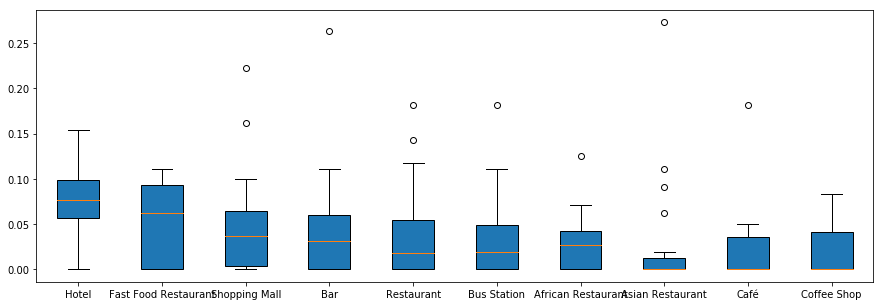

In [91]:
fig= plt.figure(figsize=(15,5))

boxplot(data.iloc[:,5:15].T,labels=data.columns[5:15],patch_artist=True)
plt.show()

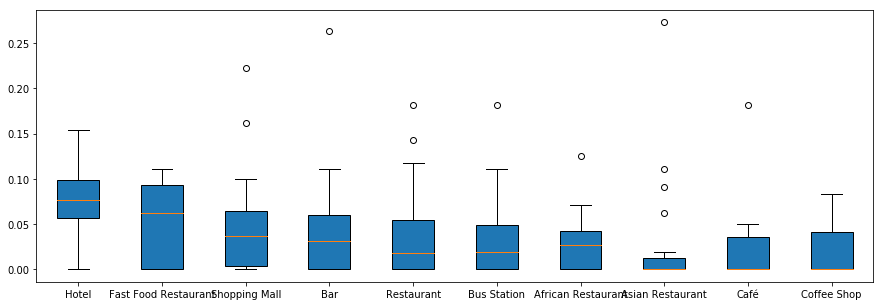

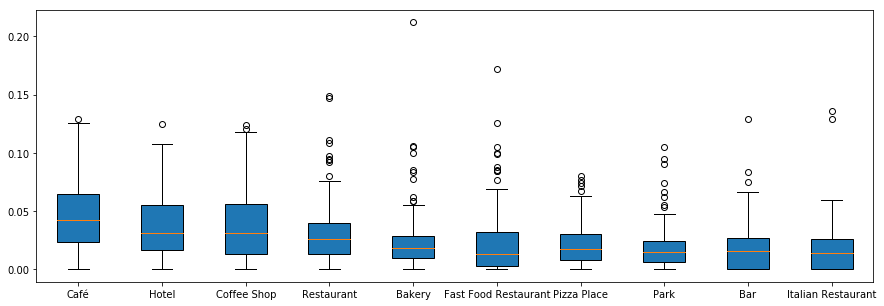

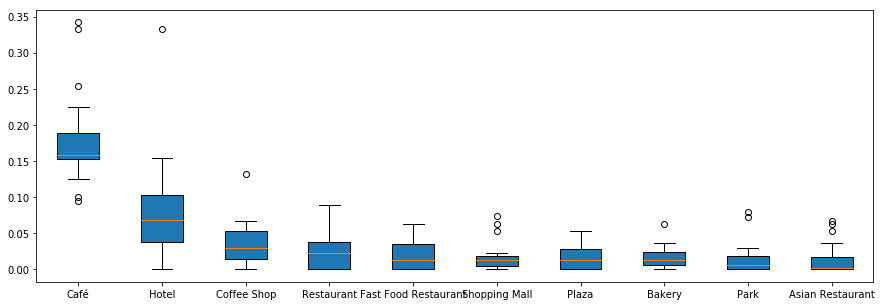

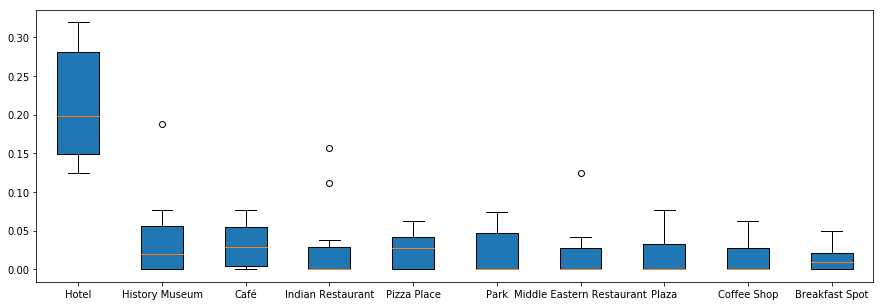

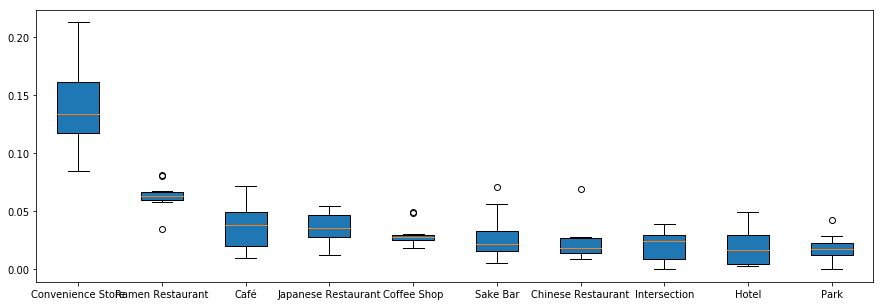

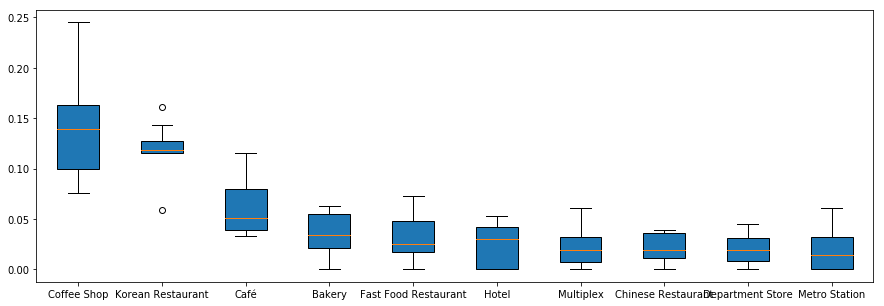

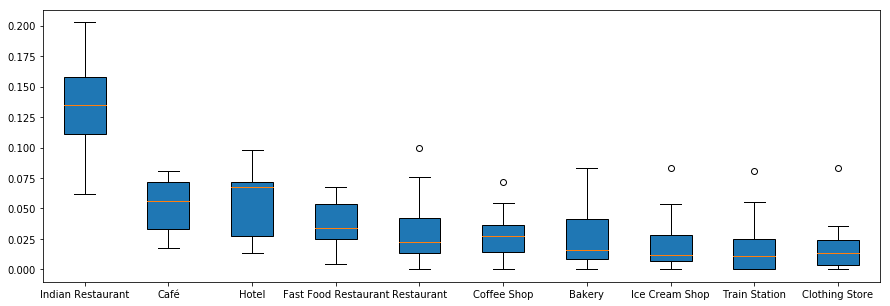

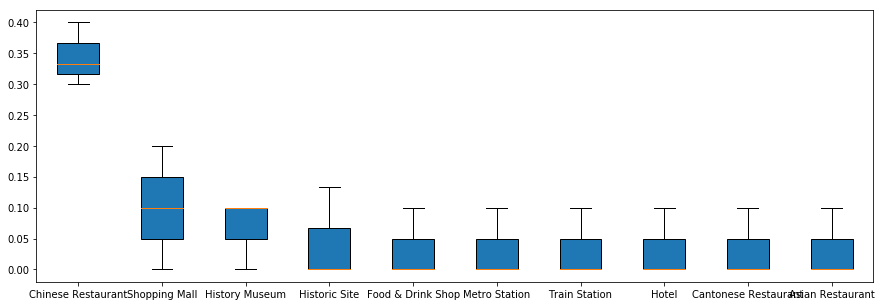

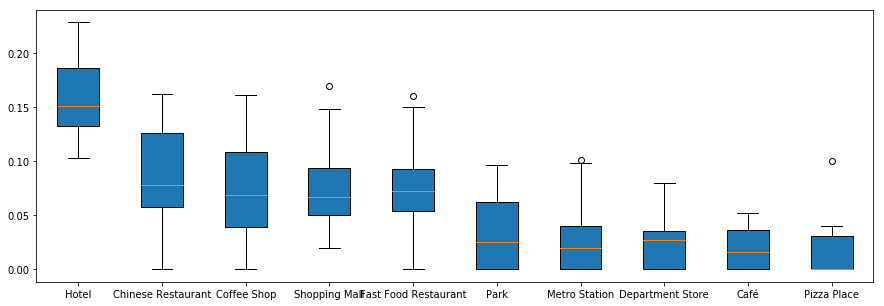

In [104]:
for k in range(9):
    cluster=clusters[k].drop(columns='Label')
    data=cluster.iloc[:,:5].join(cluster[cluster.sum()[5:].sort_values(ascending=False).keys()])
    data=data.loc[:,(data.sum(axis=0) != 0)]
    data.reset_index(drop=True)
    fig= plt.figure(figsize=(15,5))

    boxplot(data.iloc[:,5:15].T,labels=data.columns[5:15],patch_artist=True)
    
    map = folium.Map(location=[48.864716, 2.349014], zoom_start=2)
    for i, point in cluster.iterrows():
        folium.Circle(location=[point['Latitude'],point['Longitude']],
                      popup=str(point['City'])+'\npop: '+str(format(int(point['Population city']),',')),
                      color=colors[k],
                      radius=point['Population city']/75,
                      fill=True,
                      fill_color=colors[k]).add_to(map)

    display(map)
    plt.show()